In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data

a) generate a cnn model with conv2d, relu activation and maxpolling layer

In [2]:
inputs = Input((28, 28, 1))
x = Conv2D(filters = 32, kernel_size = (3, 3), strides=(1,1), padding = 'same', activation = 'relu')(inputs)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides=(1,1), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1,1))(x)

x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
without_augmented_model = Model(inputs, outputs, name = 'CNN_Not_Augmented')
with_augmented_model = Model(inputs, outputs, name = 'CNN_Augmented')


In [3]:
without_augmented_model.summary()

Model: "CNN_Not_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788,426 (10.64 MB)

 Trainable params: 2,788,426 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
with_augmented_model.summary()

Model: "CNN_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788,426 (10.64 MB)

 Trainable params: 2,788,426 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step
trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))


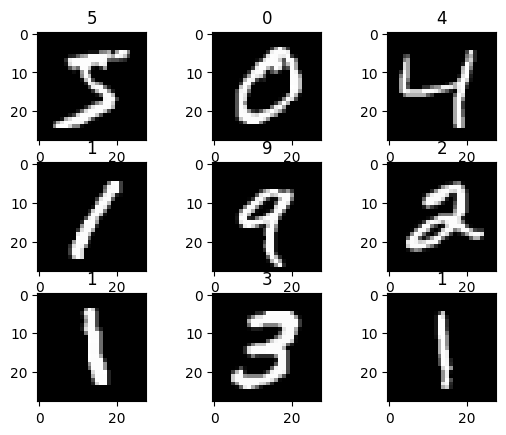

In [6]:
(trainX, trainY), (testX, testY) = load_data()


print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))

# Dispaly image data
display_img(trainX[:9], trainY[:9])

In [7]:
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

print(f'trainX.shape: {trainX.shape}, testX.shape: {testX.shape}')

trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)


print(f'trainy.shpae{trainY.shape} testy.shape{testY.shape}')
print(trainY[:5])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1)
trainy.shpae(60000, 10) testy.shape(10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:

datagen = ImageDataGenerator(
    rotation_range= 5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
)


augmented_data = []
augmented_labels = []
for x_batch, y_batch in datagen.flow(trainX, trainY, batch_size=32, shuffle=False):
    augmented_data.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_data) * 32 >= len(trainX):
        break

augmented_data = np.concatenate(augmented_data)
augmented_labels = np.concatenate(augmented_labels)

# Combine the original data with the augmented data
trainX_augmented = np.concatenate((trainX, augmented_data), axis=0)
trainY_augmented = np.concatenate((trainY, augmented_labels), axis=0)

print(f'Augmented trainX shape: {trainX_augmented.shape}, Augmented trainY shape: {trainY_augmented.shape}')

#augment the test data
augmented_test_data = []
augmented_test_labels = []
for x_batch, y_batch in datagen.flow(testX, testY, batch_size=32, shuffle=False):
    augmented_test_data.append(x_batch)
    augmented_test_labels.append(y_batch)
    if len(augmented_test_data) * 32 >= len(testX):
        break

augmented_test_data = np.concatenate(augmented_test_data)
augmented_test_labels = np.concatenate(augmented_test_labels)

# Combine the original test data with the augmented test data
testX_augmented = np.concatenate((testX, augmented_test_data), axis=0)
testY_augmented = np.concatenate((testY, augmented_test_labels), axis=0)

print(f'Augmented testX shape: {testX_augmented.shape}, Augmented testY shape: {testY_augmented.shape}')


Augmented trainX shape: (120000, 28, 28, 1), Augmented trainY shape: (120000, 10)
Augmented testX shape: (20000, 28, 28, 1), Augmented testY shape: (20000, 10)


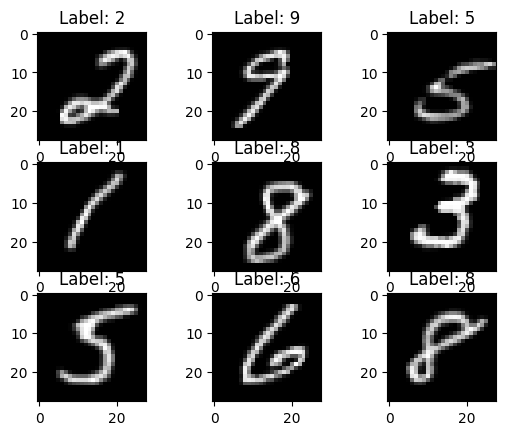

In [9]:
# Convert one-hot encoded labels to class indices
titles = [f'Label: {np.argmax(label)}' for label in trainY_augmented[-9:]]

# Display the images with the corresponding titles
display_img(trainX_augmented[-9:], titles)


In [10]:
without_augmented_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
without_augmented_history = without_augmented_model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.8941 - loss: 12.8464 - val_accuracy: 0.9725 - val_loss: 0.1001
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9775 - loss: 0.0906 - val_accuracy: 0.9860 - val_loss: 0.0652
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 70s 42ms/step - accuracy: 0.9853 - loss: 0.0557 - val_accuracy: 0.9817 - val_loss: 0.0980
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.9887 - loss: 0.0504 - val_accuracy: 0.9865 - val_loss: 0.0715
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 39ms/step - accuracy: 0.9898 - loss: 0.0454 - val_accuracy: 0.9845 - val_loss: 0.1125
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.9925 - loss: 0.0377 - val_accuracy: 0.9875 - val_loss: 0.1205
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 39ms/step - accuracy: 0.9936 - loss: 0.0297 - val_accuracy: 0.9848 - val_loss: 0.1370
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.9946 

In [ ]:
# Non-augmented model on non-augmented data
score_of_non_augmented_model_with_non_augmented_data = without_augmented_model.evaluate(testX, testY, verbose=0)


# Non-augmented model on augmented data
score_of_non_augmented_model_with_augmented_data = without_augmented_model.evaluate(testX_augmented, testY_augmented, verbose=0)


In [ ]:
with_augmented_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
with_augmented_history = with_augmented_model.fit(trainX_augmented, trainY_augmented, batch_size = 32, validation_split = 0.1, epochs = 10)

In [ ]:
# Augmented model on non-augmented data
score_of_augmented_model_with_non_augmented_data = with_augmented_model.evaluate(testX, testY, verbose=0)

# Augmented model on augmented data
score_of_augmented_model_with_augmented_data = with_augmented_model.evaluate(testX_augmented, testY_augmented, verbose=0)

In [ ]:
#Non augmented Model
print(f'Accuracy of on non-augmented model on non-augmented data: {score_of_non_augmented_model_with_non_augmented_data[1] * 100:.2f}%')
print(f'Accuracy of non-augmented model on augmented data: {score_of_non_augmented_model_with_augmented_data[1] * 100:.2f}%')

#Augmented Model
print(f'Accuracy of augmented model on non augmented data {score_of_augmented_model_with_non_augmented_data[1]*100:.2f}%')
print(f'Accuracy of augmented Model data on augmented data {score_of_augmented_model_with_augmented_data[1]*100:.2f}%')

In [ ]:
import pandas as pd
from tabulate import tabulate

# Creating a dictionary to store the values
data = {
    'Non-Augmented Data': [
        f"{score_of_non_augmented_model_with_non_augmented_data[1] * 100:.2f}%",
        f"{score_of_augmented_model_with_non_augmented_data[1] * 100:.2f}%"
    ],
    'Augmented Data': [
        f"{score_of_non_augmented_model_with_augmented_data[1] * 100:.2f}%",
        f"{score_of_augmented_model_with_augmented_data[1] * 100:.2f}%"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data, index=['Non-Augmented Model', 'Augmented Model'])

# Displaying the DataFrame as a table with spacing
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


In [ ]:
plt.plot(without_augmented_history.history['accuracy'], label='Non-Augmented Model')
plt.plot(with_augmented_history.history['accuracy'], label='Augmented Model')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
